# Forecasting Asssignment
### Edgar Robles Díaz

**1. Objective - Predict the stock price for the following symbols till the end of 2020:**

**Tech Industry**
* Apple
* Microsoft
* Amazon
* Google
* Facebook

**Banking Industry**
* Wells fargo (WFC)
* Bank of America (BAC)

**Aerospace Indsutry**
* General Dynamics (GD)
* Lockheed Martin (LMT)
* Boeing (BA)
 
**2. Demonstrate and document the following processes**
* Where and how to get the stock data
* How data is processed
* The modeling and predicting process
* The factors the are considered and not considered in this exercise


# Data Processing

In [ ]:
### Import relevant libraries for data processing, visualization and modelling

In [102]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
os.getcwd()

'C:\\Users\\edari\\Desktop'

In [ ]:
### Get names of company ticks ###

In [8]:
ticks = ['AAPL', 'MSFT', 'AMZN', 'GOOG', 'FB', 'WFC', 'BAC', 'GD', 'LMT', 'BA']

For this analysis, the data source for the stock prices can be found on Yahoo Finance, the reason behind this source relies in both the qaulity of the information as it is in daily prices as well as the availability of full historic data. Several companies offering financial data through APIs usually offer a limited time frame in free versions of the service, this could yield unbiased results due to lack of information, therefore, Yahoo Finance Data might do the trick.

Yahoo Finance API went down in 2017 and several third party APIs exist but in order to get the exact information the data was extracted directly from the site https://finance.yahoo.com/

The ticks for the selected stocks were entered into the search bar and for each tick, a csv was downloaded with historical prices since its first listings in stock markets.

Save all separate dataframes by company in a list of dataframes in order to perform transformations over all the data in for loops.

In [9]:
dfs = [pd.read_csv(t+'.csv') for t in ticks]

In [ ]:
### Looking for missing values in the data

In [43]:
for i, t in zip(dfs, ticks):
    print(i['Close'].isnull().sum(), t)

1 AAPL
0 MSFT
0 AMZN
0 GOOG
0 FB
0 WFC
0 BAC
0 GD
0 LMT
0 BA


In [61]:
dfs[0][dfs[0]['Close'].isnull()]

,Date,Close
165,1981-08-10,NaN


In [ ]:
### Forward fill the value

In [63]:
dfs[0]['Close'] = dfs[0]['Close'].ffill()

In [21]:
for i in dfs:
    i.drop(columns=['Open', 'High', 'Low', 'Adj Close', 'Volume'], inplace = True)
    i.Date = pd.to_datetime(i.Date)

In [34]:
for i, t in zip(dfs, ticks):
    print(i.Date.min(), t)

1980-12-12 00:00:00 AAPL
1986-03-13 00:00:00 MSFT
1997-05-15 00:00:00 AMZN
2004-08-19 00:00:00 GOOG
2012-05-18 00:00:00 FB
1972-06-01 00:00:00 WFC
1973-02-21 00:00:00 BAC
1977-01-03 00:00:00 GD
1977-01-03 00:00:00 LMT
1962-01-02 00:00:00 BA


Once the data is preporcessed and missing values are dealt with, the next step is to look at the data. Arranging and merging dercriptive data (mean, std, quantiles) we can look at the prices distribution over time. One thing to notice is that the most valuable companies in terms of Close price are in the tech sector. Non surprisingly both Amazon and Apple became the first companies to reach a market cap of 1 trillion USD, with Apple even get as far as $2 trillion during mid 2020.

In [96]:
descr = [d.describe() for d in dfs]

In [99]:
descr_table = pd.concat(descr, axis = 1)

In [100]:
descr_table.columns = ticks

In [101]:
descr_table

,AAPL,MSFT,AMZN,GOOG,FB,WFC,BAC,GD,LMT,BA
count,10033.000000,8707.000000,5881.000000,4055.000000,2103.000000,12187.000000,12007.000000,11030.000000,11030.000000,14786.000000
mean,9.195985,31.517729,391.553883,531.944585,119.398897,17.687493,16.746547,48.466066,74.088278,47.581472
std,17.399846,36.334837,627.530597,384.017275,63.663188,17.892633,14.198831,55.582875,95.180643,75.038919
min,0.049107,0.090278,1.395833,49.818268,17.730000,0.489583,0.828125,0.931250,0.920245,0.382716
25%,0.270089,3.664063,38.049999,240.142387,68.329998,1.260417,4.671875,6.875000,13.535276,2.362140
50%,0.438616,26.389999,84.190002,342.511169,118.570000,9.125000,12.687500,23.609375,39.937500,20.062500
75%,10.502500,35.185000,370.559998,771.209991,173.770004,29.862500,27.816250,69.054999,83.097498,59.049374
max,134.179993,231.649994,3531.449951,1728.280029,303.910004,65.930000,54.900002,229.949997,439.850006,440.619995


# Add macroeconomic data in order to explain long term variations in stock price movement ###

For the forecasting to be accurate is necessary to incorporate additional factors that can explain long-run dynamics of daily stock prices. For this assignment data on overall market behaviour will be taken into account with the Dow Jones S&P 500 Index. This variable captures 80% of market value with the top capitalizaing companies. Although several indexes exist within industries (Aerospace and Defense, Technology and Banks select industry) and might explain further along stock price behaviour they were omitted due to one reason: This indexes rely on a small number of companies, especially the technology and aerospace sector and the companies to forecast represent a big part of these, so we might encounter spurious regression issues.

As same as stock price data, the S&P 500 index has its historical data available in Yahoo Finance Website and ranges since 1960 till Friday 25th, 2020.

In [165]:
s_p_500 = pd.read_csv('^GSPC.csv')

In [167]:
s_p_500.drop(columns=['Open','High', 'Low', 'Adj Close', 'Volume'], inplace = True)

In [168]:
s_p_500['Date'] = pd.to_datetime(s_p_500['Date'])

In [170]:
s_p_500.isnull().sum()

Date     0
Close    0
dtype: int64

In [173]:
s_p_500.rename(columns={'Close':'S&P 500'}, inplace = True)

In [175]:
s_p_500['ln_S&P 500'] = np.log(s_p_500['S&P 500'])

### Plot the data

Text(0.5, 1.0, 'S&P Index Close Prices')

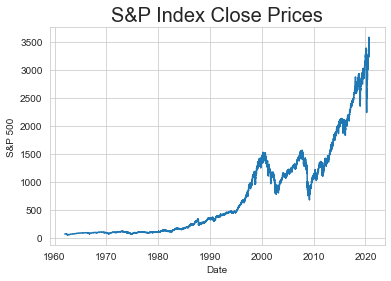

In [229]:
sns.lineplot(x='Date', y = 'S&P 500', data = s_p_500)
plt.title('S&P Index Close Prices', fontsize=20)

Text(0.5, 1.0, 'S&P Index log Close Prices')

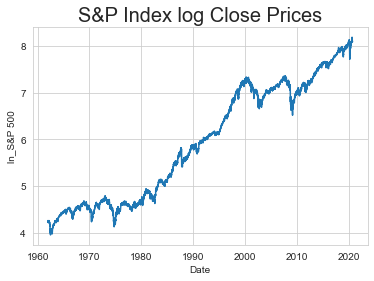

In [230]:
sns.lineplot(x='Date', y = 'ln_S&P 500', data = s_p_500)
plt.title('S&P Index log Close Prices', fontsize=20)

Additionaly, in order to take into account the macreoconomic determinants of stock pricing, the Daily Effective Funds Rate was selected for the modelling of long term relationships between aggregate behaviour in the markets and stock prices.

The federal funds rate is the interest rate at which depository institutions trade federal funds with each other overnight. When a depository institution has surplus balances in its reserve account, it lends to other banks in need of larger balances. The effective federal funds rate is essentially determined by the market but is influenced by the Federal Reserve through open market operations to reach the federal funds rate target.

Data on the interest rate was retrived form the Federal Reserve Economic Data (FRED) from the following website : https://fred.stlouisfed.org/series/DFF

In [177]:
int_rate = pd.read_csv('DFF.csv')

In [179]:
int_rate.rename(columns={'DATE':'Date', 'DFF':'Int_rate'}, inplace =True)

In [180]:
int_rate['Date'] = pd.to_datetime(int_rate['Date'])

In [184]:
int_rate['ln_Int_rate'] = np.log(int_rate['Int_rate'])

Text(0.5, 1.0, 'Daily Effective Federal Funds Rate')

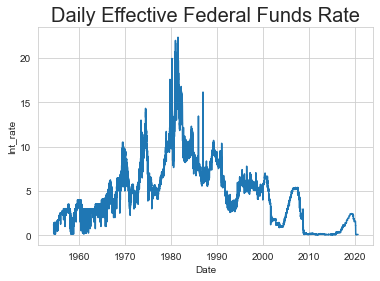

In [231]:
sns.lineplot(x='Date', y = 'Int_rate', data = int_rate)
plt.title('Daily Effective Federal Funds Rate', fontsize=20)

Text(0.5, 1.0, 'Daily Log Effective Federal Funds Rate')

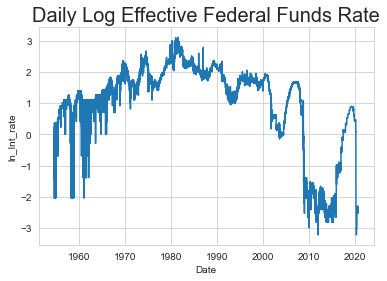

In [232]:
sns.lineplot(x='Date', y = 'ln_Int_rate', data = int_rate)
plt.title('Daily Log Effective Federal Funds Rate', fontsize=20)

In [212]:
dfs_full = [d.merge(s_p_500, on='Date', how = 'inner').merge(int_rate, on='Date', how='inner') for d in dfs]

# Get plots of daily closing prices of each stock by industry (Tech/blue, Banking/Red, Aerospace/Black)

Data on stock prices reflect the behaviour of companies and performance as well as market expectations. In the case of tech companies, it's visible that an upper trend exists in this regard. Even though some of this companies became affected by recessions like Facebook, the rest of them keep going upward. In the recent wake of the pandemic crisis, most of this companies surged, while many people stay at home, digital activities surge during this period. 

In [160]:
sns.set_style('whitegrid')

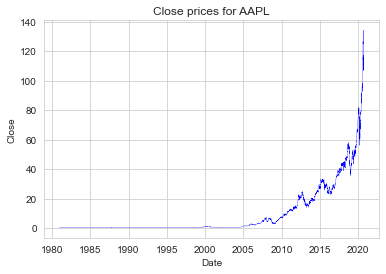

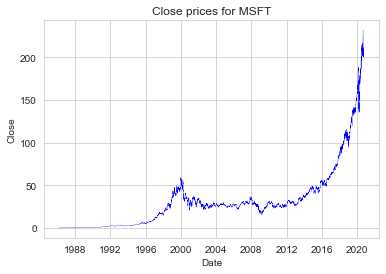

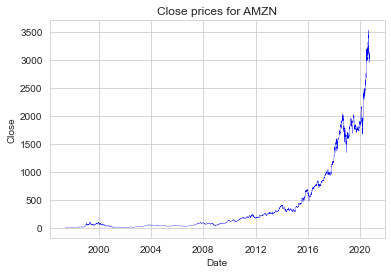

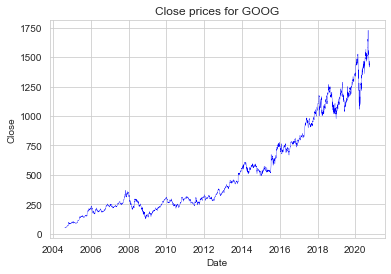

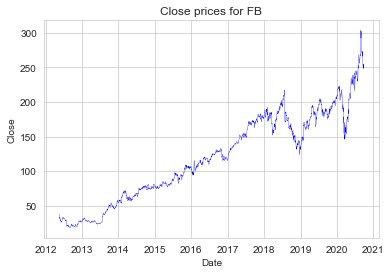

In [161]:
for d, t in zip(dfs[:5], ticks):
    plt.figure()
    sns.lineplot(x = 'Date', y = 'Close', data = d, color = 'Blue', linewidth=0.3)
    plt.title( 'Close prices for '+t)

For the banking companies is clear that the effects of the 2008 financial crisis left a long term shock that affected overall pricing of both companies. Unlike tech companies, both banking firms turned out to be affected by the recent pandemic. Mainly, aggregate consumption and demand for financial services plummeted, which affected stock pricing of both entitites. In the same regard, the riskier environment also affected the performance in the market as many consumers in the US are having financial issues as a consquence of high unemployment rates and uncertainty.

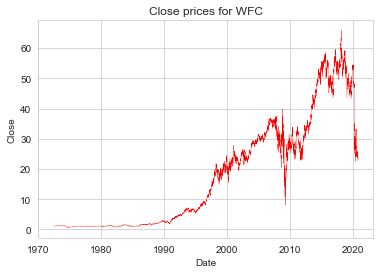

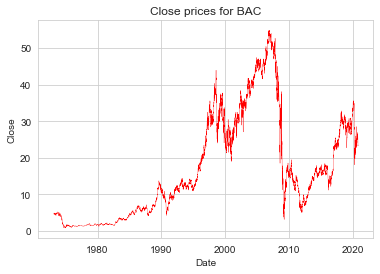

In [162]:
for f, h in zip(dfs[5:7], ticks[5:7]):
    plt.figure()
    sns.lineplot(x = 'Date', y = 'Close', data = f, color = 'Red', linewidth=0.3)
    plt.title( 'Close prices for '+h)

As for the aerospace companies, the effect of the pandemic was large in this industry, especially for Boeing. Unlike its competitiors, Boeing's main activities focus on the production and sales of commercial aircraft, due to the halting of the industry, Boeing's market performance was affected as well. For the case of Lockheed Martin and General Dynamics, the effect was not as large. Mainly, because of their dependence of military and governmente contracts provided by the DoD. In this regard, pricing for this companies was not as large asa it was for Boeing.

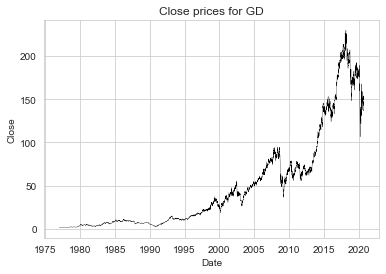

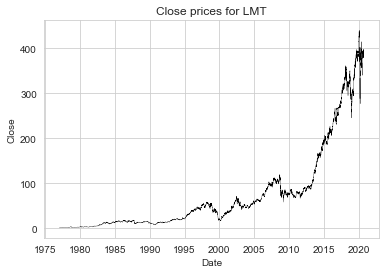

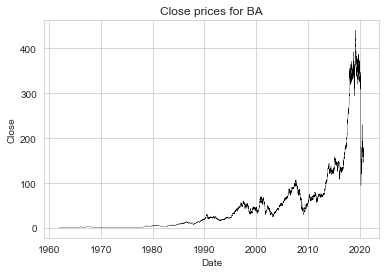

In [163]:
for f, h in zip(dfs[7:], ticks[7:]):
    plt.figure()
    sns.lineplot(x = 'Date', y = 'Close', data = f, color = 'Black', linewidth=0.3)
    plt.title( 'Close prices for '+h)

# Data Modelling

## Long run equilibrium model: Vector error correction model (VECM)

Although an estimation based on univariate time series in teh context of ARIMA models might yield fruitful forecasts, the explanatory power of this forecasts fades away as the forecasting horizon expands. Thus, we might need to incoporate long run relationships in order to get accurate forecasts of stock prices. 

In this regard, the relation certain variables hold with either the overall market performance and/or macroeconomic factors can explain the behaviour of stock pricing in the future. Thus the need arises of establishing a model that incoporate those effects.

The Vector error correction model (VECM) is an extension of a VAR model, which estimate multivariate time series analysis in order to estiamte data bahaviour in the future.

This model incorporates this long term relationship by estimating cointegrating factors between time series.

The model can be written in the form: (Lütkepohl, H. 2005)

$\Delta y_t = \Pi y_{t-1} + \Gamma_1 \Delta y_{t-1} + \ldots + \Gamma_{k_{ar}-1} \Delta y_{t-k_{ar}+1} + u_t$


where:

$\Pi = \alpha \beta'
$

Therefore, we must perform several analysis over the data. In the first place, test for stationarity and order of integration for both Stocks and Macro data. Afterwards, determine the order of lags to incorporate into the final model.
Estimate causality test in order to review the explanatory power of the data over stock prices, then, to estiamte cointegration to verify long term relationships and finally estimate the VECM model and plot forecasts till the end of the year.

# Testing and looking for stationarity

In order to perform accurate forecasts for the stock prices, we need to test the stationarity of the prices, that is, both covariance and mean converge to constant terms. If otherwise, the data might contain trending and seasonality information that further diverge the mean and covariance, thus mking forecasts unviable.

In order to test for stationarity, autocorrelation plots of the prices over several lags and a statistic test in order to look for non-stationary processess (i.e. unit roots) will be applied to the data.

### Autocorrelaction plots ###

In [106]:
from statsmodels.graphics.tsaplots import plot_acf

<Figure size 432x288 with 0 Axes>

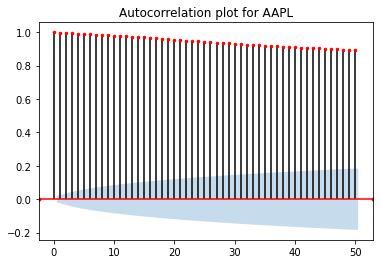

<Figure size 432x288 with 0 Axes>

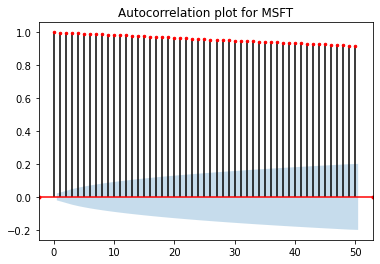

<Figure size 432x288 with 0 Axes>

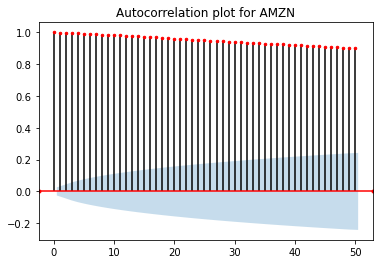

<Figure size 432x288 with 0 Axes>

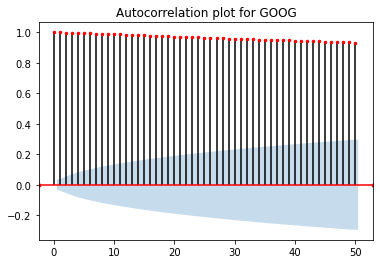

<Figure size 432x288 with 0 Axes>

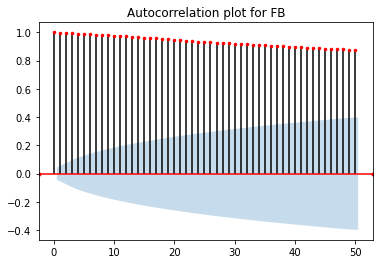

<Figure size 432x288 with 0 Axes>

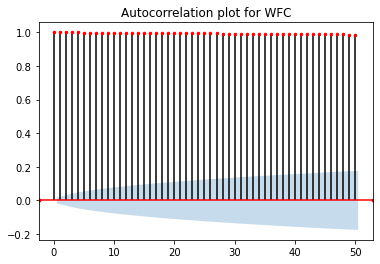

<Figure size 432x288 with 0 Axes>

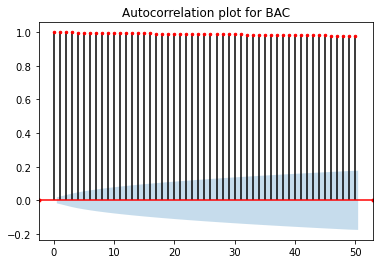

<Figure size 432x288 with 0 Axes>

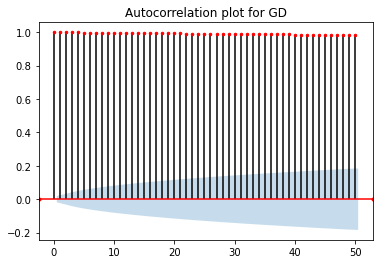

<Figure size 432x288 with 0 Axes>

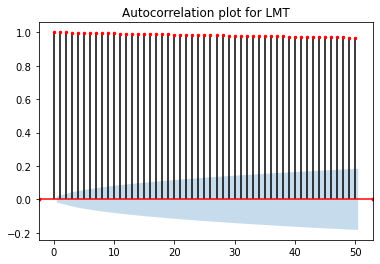

<Figure size 432x288 with 0 Axes>

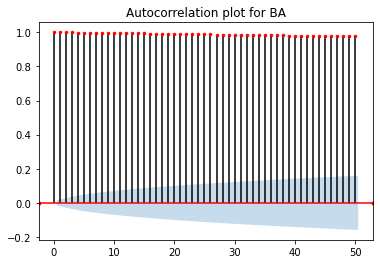

In [138]:
for d, t in zip(dfs, ticks):
    plt.figure()
    plot_acf(d['Close'], lags = 50, marker='.', color='Red', vlines_kwargs={'color':'Black'})
    plt.title( 'Autocorrelation plot for '+t)

Essentialy all processes look non-stationary, thus it might be pertinent to first-difference and log transform the data.

### Create log transformation and first difference of close prices ###

In [103]:
for i in dfs:
    i['ln_Close'] = np.log(i['Close'])

In [125]:
for i in dfs:
    i['diff_ln_Close'] = i['Close'].diff()

### Autocorrelation with first difference and log transformed data ###

<Figure size 432x288 with 0 Axes>

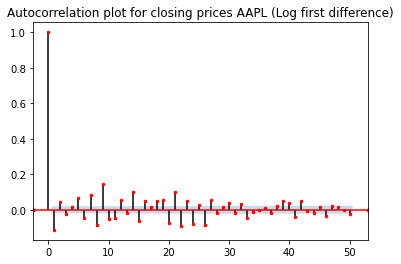

<Figure size 432x288 with 0 Axes>

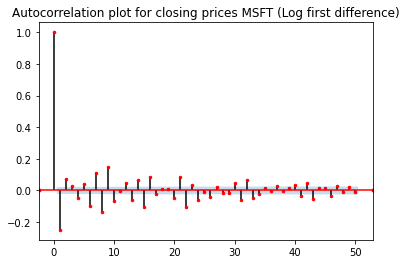

<Figure size 432x288 with 0 Axes>

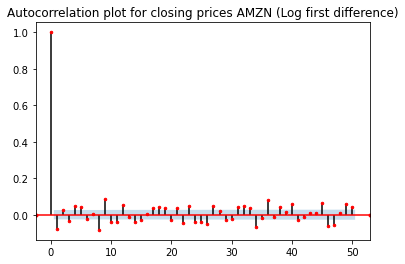

<Figure size 432x288 with 0 Axes>

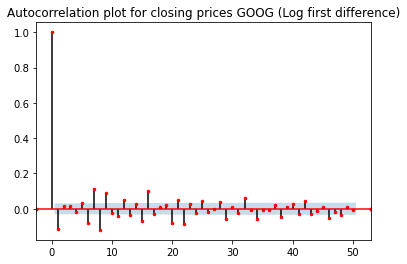

<Figure size 432x288 with 0 Axes>

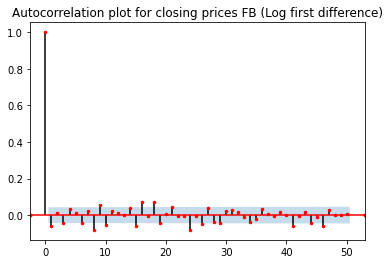

<Figure size 432x288 with 0 Axes>

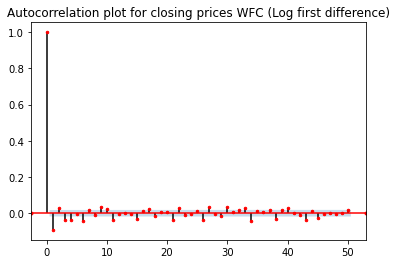

<Figure size 432x288 with 0 Axes>

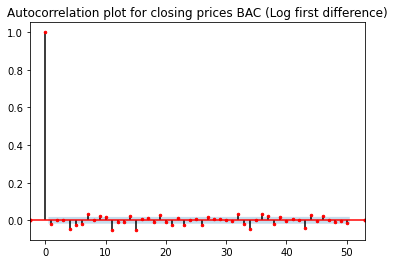

<Figure size 432x288 with 0 Axes>

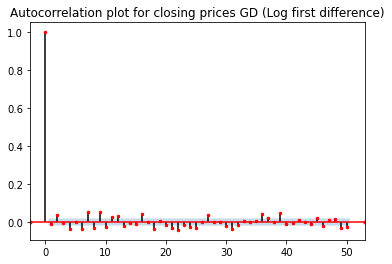

<Figure size 432x288 with 0 Axes>

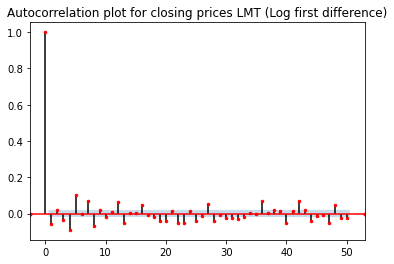

<Figure size 432x288 with 0 Axes>

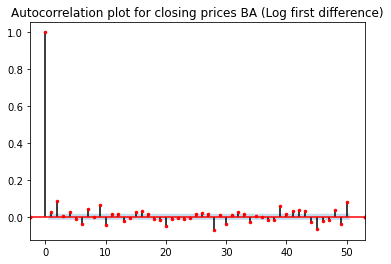

In [139]:
for d, t in zip(dfs, ticks):
    plt.figure()
    plot_acf(d['diff_ln_Close'].dropna(), lags = 50, alpha = 0.05, marker='.',  color='Red', vlines_kwargs={'color':'Black'})
    plt.title( 'Autocorrelation plot for closing prices '+t+' (Log first difference)')

As expected, autocorrelation has been dealt with, which now lets us build further inferences about the data

### Statistic test for unit root (Augmented Dickey-Fuller Test) for closing prices 

In [145]:
from statsmodels.tsa.stattools import adfuller

In [158]:
for d, t in zip(dfs, ticks):
    adf = adfuller(d['Close'], autolag = 'AIC')
    print('Augmented Dickey Fuller Test for ' + t + ' (Close price) with %f lags is: %f and p-value of %f' % (adf[2] ,adf[0], adf[1]))

Augmented Dickey Fuller Test for AAPL (Close price) with 38.000000 lags is: 5.581780 and p-value of 1.000000
Augmented Dickey Fuller Test for MSFT (Close price) with 34.000000 lags is: 7.161341 and p-value of 1.000000
Augmented Dickey Fuller Test for AMZN (Close price) with 34.000000 lags is: 4.823949 and p-value of 1.000000
Augmented Dickey Fuller Test for GOOG (Close price) with 27.000000 lags is: 0.442974 and p-value of 0.983033
Augmented Dickey Fuller Test for FB (Close price) with 26.000000 lags is: -0.290371 and p-value of 0.926857
Augmented Dickey Fuller Test for WFC (Close price) with 40.000000 lags is: -1.427006 and p-value of 0.569263
Augmented Dickey Fuller Test for BAC (Close price) with 38.000000 lags is: -1.537288 and p-value of 0.514991
Augmented Dickey Fuller Test for GD (Close price) with 39.000000 lags is: -0.451054 and p-value of 0.901219
Augmented Dickey Fuller Test for LMT (Close price) with 39.000000 lags is: 2.468712 and p-value of 0.999039
Augmented Dickey Fulle

Augmented Dickey Fuller tests look for a unit root within the time series data over several lags, it builds on the null hypothesis of presence of unit roots. For non-differentiated data, the test fails to reject the null hypothesis.

### Apply logarithmic and first difference transformation in order to btain a linear and stationary time series 

In [159]:
for d, t in zip(dfs, ticks):
    adf = adfuller(d['diff_ln_Close'].dropna(), autolag = 'AIC')
    print('Augmented Dickey Fuller Test for ' + t + ' (First diff log Close price) with %f lags is: %f and p-value of %f' % (adf[2] ,adf[0], adf[1]))

Augmented Dickey Fuller Test for AAPL (First diff log Close price) with 38.000000 lags is: -14.861172 and p-value of 0.000000
Augmented Dickey Fuller Test for MSFT (First diff log Close price) with 37.000000 lags is: -16.267377 and p-value of 0.000000
Augmented Dickey Fuller Test for AMZN (First diff log Close price) with 34.000000 lags is: -12.879162 and p-value of 0.000000
Augmented Dickey Fuller Test for GOOG (First diff log Close price) with 31.000000 lags is: -11.230516 and p-value of 0.000000
Augmented Dickey Fuller Test for FB (First diff log Close price) with 25.000000 lags is: -8.976646 and p-value of 0.000000
Augmented Dickey Fuller Test for WFC (First diff log Close price) with 39.000000 lags is: -16.168577 and p-value of 0.000000
Augmented Dickey Fuller Test for BAC (First diff log Close price) with 37.000000 lags is: -18.389669 and p-value of 0.000000
Augmented Dickey Fuller Test for GD (First diff log Close price) with 38.000000 lags is: -16.521254 and p-value of 0.000000

Once the data is transformed, the data is confirmed to be stationary

### Perform DF test to macro variables as well in order to check stationarity

In [215]:
names = ['S&P 500 Index', 'Effective Federal Funds Rate', 'WTI Oil Prices']

In [219]:
adf = adfuller(s_p_500['S&P 500'], autolag = 'AIC')
print('Augmented Dickey Fuller Test for ' + names[0] + ' (Close price) with %f lags is: %f and p-value of %f' % (adf[2] ,adf[0], adf[1]))

Augmented Dickey Fuller Test for S&P 500 Index (Close price) with 42.000000 lags is: 2.222671 and p-value of 0.998901


In [222]:
adf = adfuller(int_rate['Int_rate'], autolag = 'AIC')
print('Augmented Dickey Fuller Test for ' + names[1] + ' with %f lags is: %f and p-value of %f' % (adf[2] ,adf[0], adf[1]))

Augmented Dickey Fuller Test for Effective Federal Funds Rate with 48.000000 lags is: -2.505713 and p-value of 0.114090


In [221]:
adf = adfuller(oil['Oil price'], autolag = 'AIC')
print('Augmented Dickey Fuller Test for ' + names[2] + ' (Close price) with %f lags is: %f and p-value of %f' % (adf[2] ,adf[0], adf[1]))

Augmented Dickey Fuller Test for WTI Oil Prices (Close price) with 33.000000 lags is: -2.101189 and p-value of 0.244037


### Apply logarithmic and first difference transformation in order to obtain a linear and stationary time series 

In [223]:
adf = adfuller(s_p_500['ln_S&P 500'].diff().dropna(), autolag = 'AIC')
print('Augmented Dickey Fuller Test for ' + names[0] + ' (Close price) with %f lags is: %f and p-value of %f' % (adf[2] ,adf[0], adf[1]))

Augmented Dickey Fuller Test for S&P 500 Index (Close price) with 33.000000 lags is: -21.092458 and p-value of 0.000000


In [224]:
adf = adfuller(int_rate['ln_Int_rate'].diff().dropna(), autolag = 'AIC')
print('Augmented Dickey Fuller Test for ' + names[1] + ' with %f lags is: %f and p-value of %f' % (adf[2] ,adf[0], adf[1]))

Augmented Dickey Fuller Test for Effective Federal Funds Rate with 48.000000 lags is: -26.509785 and p-value of 0.000000


In [225]:
adf = adfuller(oil['ln_Oil price'].diff().dropna(), autolag = 'AIC')
print('Augmented Dickey Fuller Test for ' + names[2] + ' (Close price) with %f lags is: %f and p-value of %f' % (adf[2] ,adf[0], adf[1]))

Augmented Dickey Fuller Test for WTI Oil Prices (Close price) with 33.000000 lags is: -16.135670 and p-value of 0.000000


### Add transformed data to main df

In [399]:
for i in dfs_full:
    i['diff_ln_S&P 500'] = i['ln_S&P 500'].diff()
    i['diff_ln_Int_rate'] = i['ln_Int_rate'].diff()

# Order Selection

One of the main determinants in time series forecasting is the lag operator selection, although there is not any rule of thumb regarding the selection of lags, one determinant might be related to the Information Criteria varaibles.

Thus we might select the number of lags for the order that minimize the information criteria.

In [388]:
from statsmodels.tsa.vector_ar.vecm import VECM, select_order

In [507]:
for i, t in zip(dfs_full, ticks):
    print(t, select_order(i[['ln_Close', 'ln_S&P 500', 'ln_Int_rate']], 22).summary())
    

AAPL  VECM Order Selection (* highlights the minimums) 
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0       -21.42      -21.41   4.971e-10      -21.42
1       -21.49      -21.47   4.645e-10      -21.48
2       -21.50      -21.48   4.577e-10      -21.50
3       -21.51     -21.48*   4.531e-10      -21.50
4       -21.52      -21.48   4.507e-10     -21.51*
5       -21.52      -21.47   4.503e-10      -21.51
6       -21.52      -21.47   4.506e-10      -21.50
7       -21.52      -21.46   4.509e-10      -21.50
8       -21.52      -21.45   4.503e-10      -21.50
9       -21.52      -21.45   4.499e-10      -21.50
10      -21.53      -21.44   4.485e-10      -21.50
11      -21.52      -21.43   4.488e-10      -21.49
12      -21.53      -21.43   4.477e-10      -21.49
13      -21.53      -21.42   4.478e-10      -21.49
14      -21.53      -21.42   4.473e-10      -21.49
15      -21.53      -21.41   4.463e-10      -21.49
16      -21.53      -21.41

BAC  VECM Order Selection (* highlights the minimums) 
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0       -21.89      -21.88   3.113e-10      -21.89
1       -21.96      -21.95   2.897e-10      -21.96
2       -21.98      -21.96   2.847e-10      -21.97
3       -21.99     -21.96*   2.807e-10      -21.98
4       -22.00      -21.96   2.795e-10      -21.98
5       -22.00      -21.95   2.788e-10      -21.98
6       -22.00      -21.95   2.789e-10      -21.98
7       -22.00      -21.94   2.787e-10      -21.98
8       -22.00      -21.93   2.783e-10      -21.98
9       -22.00      -21.93   2.776e-10      -21.98
10      -22.01      -21.93   2.762e-10      -21.98
11      -22.01      -21.92   2.760e-10      -21.98
12      -22.01      -21.92   2.754e-10      -21.98
13      -22.02      -21.91   2.745e-10      -21.98
14      -22.02      -21.91   2.734e-10      -21.98
15      -22.02      -21.90   2.726e-10      -21.98
16      -22.03      -21.90 

Several information criterion variables are depicted, thes come from a VECM estimation of the repsonse variables and the relevant variables were extracted. Although all the models for all stocks point to a higher order model with AIC, this takes away parsimony within the model as well as it overcomplicates it. Schwartz Criteria (BIC) points out to a lower order model (3 lags) that might get all the relevant information for a smalles number of lags. Thus a 3 order lag will be used for the rest of the analysis. 

# Test for causality between time series (Granger Causality Test)

Once the order of lags were selected, it is important to test whether the lagged time series of our macroeconomic and market data explains the pricing of stocks of the companies listed. One way to test this relationship is with the Granger Causality test. This statistical test compares a baseline, restricted model without information of exogenous time series and compares it with an unrestricted version and tests its significant with a Likelihood test ratio, as well as the Sum of Squared Residuals. If the test yields significant F and chi squared values then the data has an explanatory causal power over the stock price data. 

In [416]:
from statsmodels.tsa.stattools import grangercausalitytests

### S&P 500 Index

In [426]:
for i,t in zip(dfs_full, ticks):
    print('Statistics results for {}'.format(t))
    grangercausalitytests(i[['diff_ln_Close', 'diff_ln_S&P 500']].dropna(), maxlag=3).values
    print('\n \n')

Statistics results for AAPL

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=12.8278 , p=0.0003  , df_denom=8716, df_num=1
ssr based chi2 test:   chi2=12.8323 , p=0.0003  , df=1
likelihood ratio test: chi2=12.8228 , p=0.0003  , df=1
parameter F test:         F=12.8278 , p=0.0003  , df_denom=8716, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=5.8210  , p=0.0030  , df_denom=8713, df_num=2
ssr based chi2 test:   chi2=11.6487 , p=0.0030  , df=2
likelihood ratio test: chi2=11.6409 , p=0.0030  , df=2
parameter F test:         F=5.8210  , p=0.0030  , df_denom=8713, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=4.4155  , p=0.0042  , df_denom=8710, df_num=3
ssr based chi2 test:   chi2=13.2571 , p=0.0041  , df=3
likelihood ratio test: chi2=13.2471 , p=0.0041  , df=3
parameter F test:         F=4.4155  , p=0.0042  , df_denom=8710, df_num=3

 

Statistics results for MSFT

Granger Causality
number of

parameter F test:         F=16.9075 , p=0.0000  , df_denom=8716, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=7.1708  , p=0.0008  , df_denom=8713, df_num=2
ssr based chi2 test:   chi2=14.3497 , p=0.0008  , df=2
likelihood ratio test: chi2=14.3379 , p=0.0008  , df=2
parameter F test:         F=7.1708  , p=0.0008  , df_denom=8713, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=4.8948  , p=0.0021  , df_denom=8710, df_num=3
ssr based chi2 test:   chi2=14.6962 , p=0.0021  , df=3
likelihood ratio test: chi2=14.6838 , p=0.0021  , df=3
parameter F test:         F=4.8948  , p=0.0021  , df_denom=8710, df_num=3

 



For the case of the S&P Index, the majority of the stock prices are significantly affected by it, even ones at the 1% significance level 

### Federal Effective Interest Rate (FED)

In [427]:
for i,t in zip(dfs_full, ticks):
    print('Statistics results for {}'.format(t))
    grangercausalitytests(i[['diff_ln_Close', 'diff_ln_Int_rate']].dropna(), maxlag=3).values
    print('\n \n')

Statistics results for AAPL

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1750  , p=0.6757  , df_denom=8716, df_num=1
ssr based chi2 test:   chi2=0.1751  , p=0.6756  , df=1
likelihood ratio test: chi2=0.1751  , p=0.6756  , df=1
parameter F test:         F=0.1750  , p=0.6757  , df_denom=8716, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.0280  , p=0.9724  , df_denom=8713, df_num=2
ssr based chi2 test:   chi2=0.0560  , p=0.9724  , df=2
likelihood ratio test: chi2=0.0560  , p=0.9724  , df=2
parameter F test:         F=0.0280  , p=0.9724  , df_denom=8713, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.0732  , p=0.9744  , df_denom=8710, df_num=3
ssr based chi2 test:   chi2=0.2197  , p=0.9743  , df=3
likelihood ratio test: chi2=0.2197  , p=0.9743  , df=3
parameter F test:         F=0.0732  , p=0.9744  , df_denom=8710, df_num=3

 

Statistics results for MSFT

Granger Causality
number of

In the case of the Interest Rate, it is mainly significant in the banking sector as well as Lockheed Martin

# Test for cointegration and cointegration rank 

In order to confirm whether this variables have a long term relationship with stock pricing data, it is necesarry to check for cointegration.

Cointegration refers to the phenomenon where exists a linear combination between two non-stationary processess. In other words, cointegration arise when both time series have a stationary process in common, which indicates the presence of a long term relationship between the variables.

Therefore, a Johansen cointegration test is performed in order to look not only at the cointegration aming factors but rather the rank of cointegration. (i.e. the vector of explanatory variables that form a linear combination which represents the cointegration phenomena among several variables.)

Unlike the Engle-Granger test, this one allows for more than one cointegration variable to be explored.

There are two types of Johansen test, either with trace or with eigenvalue, and the inferences might differ. The null hypothesis for the trace test is that the number of cointegration vectors is r = r* < k, vs. the alternative that r = k. Testing proceeds sequentially for r* = 1,2, etc. and the first non-rejection of the null is taken as an estimate of r. The null hypothesis for the "maximum eigenvalue" test is as for the trace test but the alternative is r = r* + 1 and, again, testing proceeds sequentially for r* = 1,2,etc., with the first non-rejection used as an estimator for r.

In [236]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

### Trace tests

In [411]:
print()

for i, t in zip(dfs_full, ticks):
    joh = coint_johansen(i[['ln_Close', 'ln_S&P 500', 'ln_Int_rate']], det_order = 1, k_ar_diff=3)
    
    print('Johansen test results for %s: \n Trace statistics are: %f %f %f for r =0, r<=1 and r<=2 respectively \n' % (t, joh.trace_stat[0], joh.trace_stat[1], joh.trace_stat[2]))
    print('Trace critical values 90% CI: {} {} {}'.format(joh.cvt[0][0], joh.cvt[1][0], joh.cvt[2][0]))
    print('Trace critical values 95% CI: {} {} {}'.format(joh.cvt[0][1], joh.cvt[1][1], joh.cvt[2][1]))
    print('Trace critical values 99% CI: {} {} {} \n'.format(joh.cvt[0][2], joh.cvt[1][2], joh.cvt[2][2]))


Johansen test results for AAPL: 
 Trace statistics are: 25.799144 7.321792 1.292669 for r =0, r<=1 and r<=2 respectively 

Trace critical values 90% CI: 32.0645 16.1619 2.7055
Trace critical values 95% CI: 35.0116 18.3985 3.8415
Trace critical values 99% CI: 41.0815 23.1485 6.6349 

Johansen test results for MSFT: 
 Trace statistics are: 38.926596 14.845734 3.895940 for r =0, r<=1 and r<=2 respectively 

Trace critical values 90% CI: 32.0645 16.1619 2.7055
Trace critical values 95% CI: 35.0116 18.3985 3.8415
Trace critical values 99% CI: 41.0815 23.1485 6.6349 

Johansen test results for AMZN: 
 Trace statistics are: 31.337366 16.790884 3.215936 for r =0, r<=1 and r<=2 respectively 

Trace critical values 90% CI: 32.0645 16.1619 2.7055
Trace critical values 95% CI: 35.0116 18.3985 3.8415
Trace critical values 99% CI: 41.0815 23.1485 6.6349 

Johansen test results for GOOG: 
 Trace statistics are: 58.130809 23.674791 3.125848 for r =0, r<=1 and r<=2 respectively 

Trace critical values

### Eigenvalue tests

In [444]:
for i, t in zip(dfs_full, ticks):
    joh = coint_johansen(i[['ln_Close', 'ln_S&P 500', 'ln_Int_rate']].dropna(), det_order = 1, k_ar_diff=3)
    
    print('Johansen test results for %s: \n Eigenvalues: %f %f %f \n Maximum eigenvalue statistics are: %f %f %f for r =0, r<=1 and r<=2 respectively \n' % (t, joh.eig[0], joh.eig[1], joh.eig[2],  joh.max_eig_stat[0], joh.max_eig_stat[1], joh.max_eig_stat[2]))
    print('Eigenvalue critical values 90% CI: {} {} {}'.format(joh.cvm[0][0], joh.cvm[1][0], joh.cvm[2][0]))
    print('Eigenvalue critical values 95% CI: {} {} {}'.format(joh.cvm[0][1], joh.cvm[1][1], joh.cvm[2][1]))
    print('Eigenvalue critical values 99% CI: {} {} {} \n'.format(joh.cvm[0][2], joh.cvm[1][2], joh.cvm[2][2]))

Johansen test results for AAPL: 
 Eigenvalues: 0.002117 0.000691 0.000148 
 Maximum eigenvalue statistics are: 18.477352 6.029123 1.292669 for r =0, r<=1 and r<=2 respectively 

Eigenvalue critical values 90% CI: 21.8731 15.0006 2.7055
Eigenvalue critical values 95% CI: 24.2522 17.1481 3.8415
Eigenvalue critical values 99% CI: 29.2631 21.7465 6.6349 

Johansen test results for MSFT: 
 Eigenvalues: 0.002774 0.001262 0.000449 
 Maximum eigenvalue statistics are: 24.080862 10.949794 3.895940 for r =0, r<=1 and r<=2 respectively 

Eigenvalue critical values 90% CI: 21.8731 15.0006 2.7055
Eigenvalue critical values 95% CI: 24.2522 17.1481 3.8415
Eigenvalue critical values 99% CI: 29.2631 21.7465 6.6349 

Johansen test results for AMZN: 
 Eigenvalues: 0.002483 0.002318 0.000550 
 Maximum eigenvalue statistics are: 14.546482 13.574948 3.215936 for r =0, r<=1 and r<=2 respectively 

Eigenvalue critical values 90% CI: 21.8731 15.0006 2.7055
Eigenvalue critical values 95% CI: 24.2522 17.1481 3.8

For several of the companies listed, the test fails to reject the null hypothesis of zero cointegrating vectors. Although the variables selected fail to capture the long run relationship with stock prices for these companies, it might be still interesting to capture the short run term dynamics between these variables.

# VECM Modelling and Forecasting

In [447]:
from statsmodels.tsa.vector_ar.vecm import VECM

 Model the data with VECM, save the results and plot the forecast for each variable to the end of the year. 
 Alongside with the plot, print the stock price for the forecast to thr end of the year (Dec. 31, 2020) for each company listed. 

## Big Tech Forecast 

Forecast for AAPL by th end of the year is 129.67721607693483 USD 

Forecast for MSFT by th end of the year is 226.47278157858108 USD 

Forecast for AMZN by th end of the year is 3345.9083969916555 USD 

Forecast for GOOG by th end of the year is 1470.9484264069292 USD 

Forecast for FB by th end of the year is 277.4439557104766 USD 



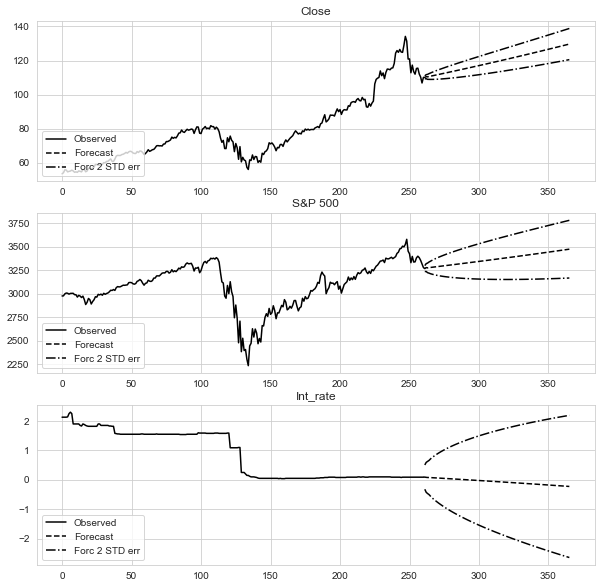

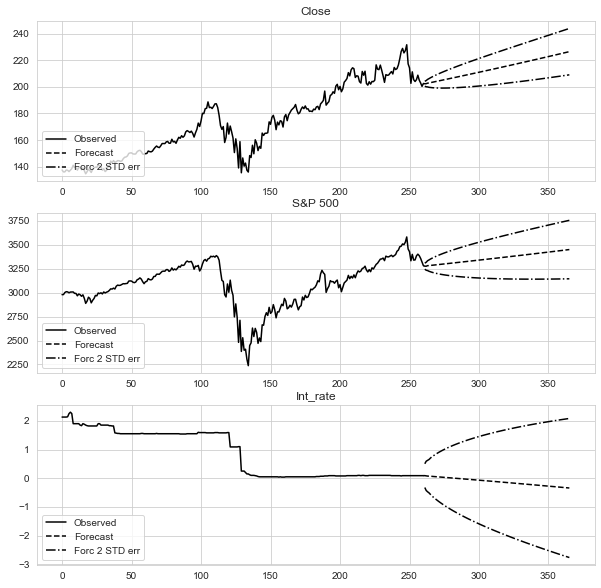

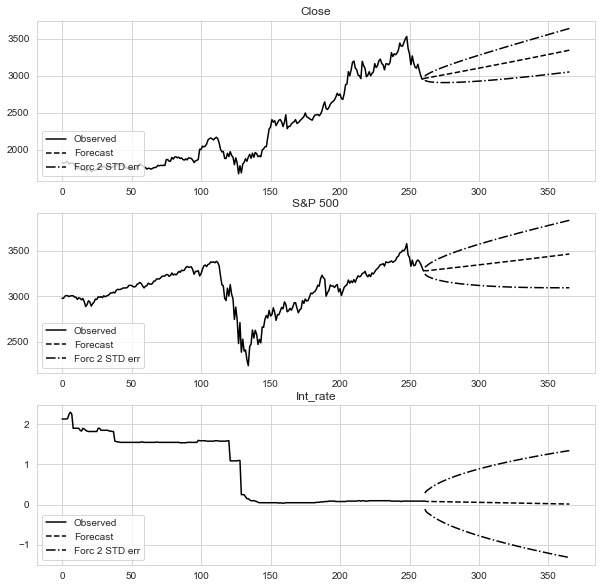

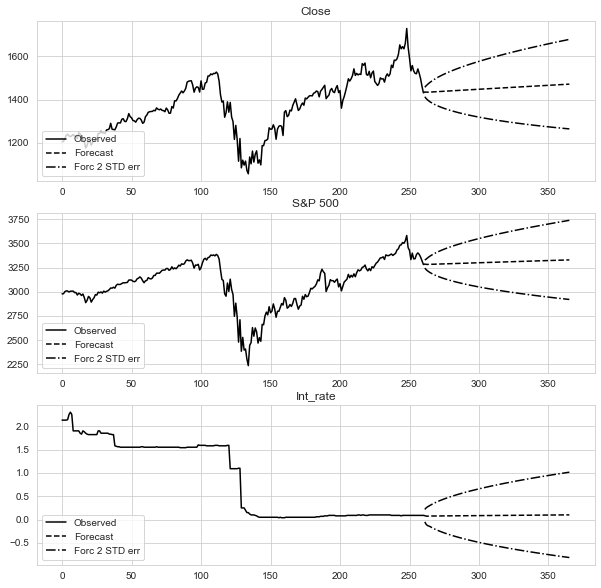

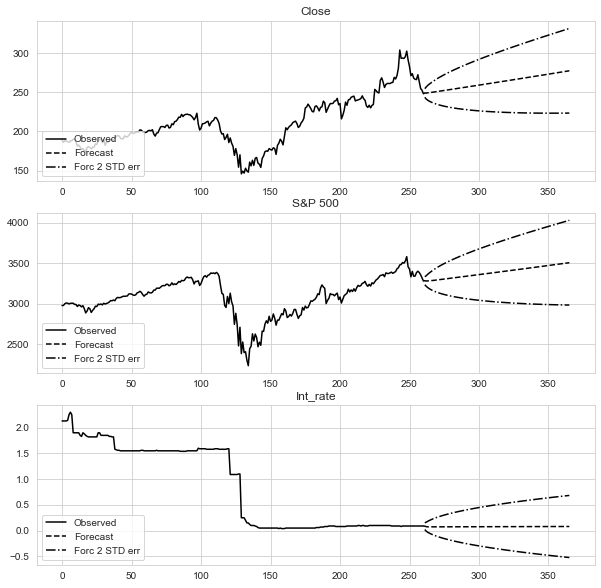

In [494]:
for i, t in zip(dfs_full[:5], ticks):
    model = VECM(i[['Close', 'S&P 500', 'Int_rate']], k_ar_diff=3, coint_rank=1)
    model_res = model.fit()
    
    model_res.plot_forecast(105, n_last_obs=261)
    print('Forecast for {} by the end of the year is {} USD \n'.format(t, model_res.predict(105)[-1][0]))

## Banking Forecast

Forecast for WFC by the end of the year is 20.653710165703203 USD 

Forecast for BAC by the end of the year is 24.73302919277249 USD 



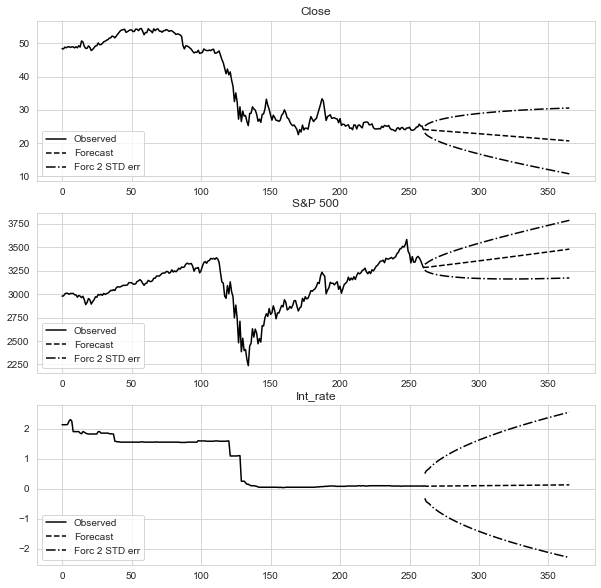

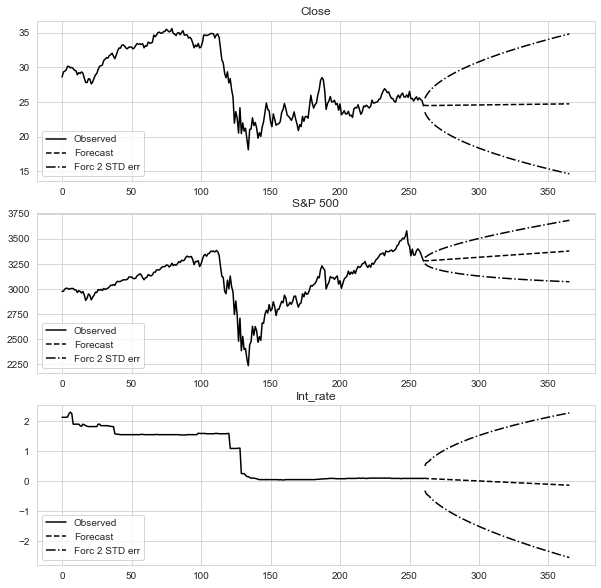

In [500]:
for i, t in zip(dfs_full[5:7], ticks[5:7]):
    model = VECM(i[['Close', 'S&P 500', 'Int_rate']], k_ar_diff=3, coint_rank=1)
    model_res = model.fit()
    
    model_res.plot_forecast(105, n_last_obs=261)
    print('Forecast for {} by the end of the year is {} USD \n'.format(t, model_res.predict(105)[-1][0]))

## Aerospace Forecast

Forecast for GD by the end of the year is 138.62645972717695 USD 

Forecast for LMT by the end of the year is 393.09831915305307 USD 

Forecast for BA by the end of the year is 153.4745248138855 USD 



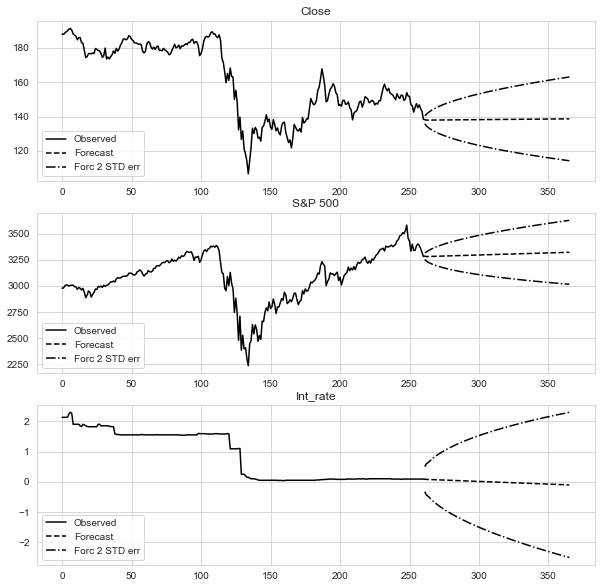

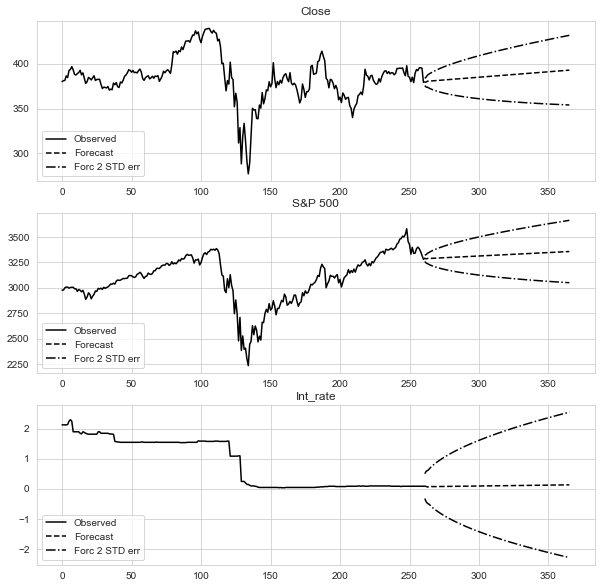

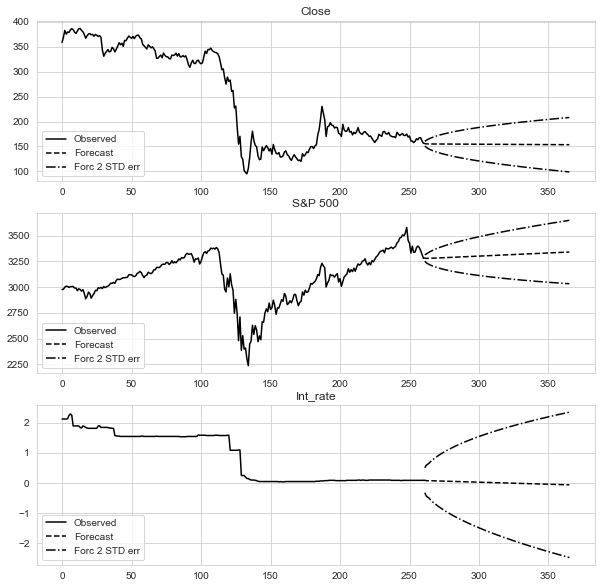

In [501]:
for i, t in zip(dfs_full[7:], ticks[7:]):
    model = VECM(i[['Close', 'S&P 500', 'Int_rate']], k_ar_diff=3, coint_rank=1)
    model_res = model.fit()
    
    model_res.plot_forecast(105, n_last_obs=261)
    print('Forecast for {} by the end of the year is {} USD \n'.format(t, model_res.predict(105)[-1][0]))